# 03 - ACB - Analizando datos
<hr>

In [67]:
# Librerías generales.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Cargamos los datos y echamos un vistazo a su tamaño, a sus campos y tipos de datos.
filepath="csv/infoEstadisticasACB_2019.csv"
dt_datos=pd.read_csv(filepath, delimiter=",", encoding = "ISO-8859-1")

In [36]:
# Un vistazo:
dt_datos.head()

,Temporada,Jornada,Equipo,LoV,Minutos,Puntos,T1,%T1,T2,%T2,T3,%T3,T,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C,Puntos_PR
0,2019,1,MKF,L,200:00,76,6/16,38%,23/39,59%,8/27,30%,34,77,22.0,19.0,15.0,20.0,
1,2019,1,SPB,V,200:00,87,19/26,73%,16/30,53%,12/30,40%,37,89,20.0,30.0,19.0,18.0,
2,2019,1,BAX,L,200:00,79,10/14,71%,15/32,47%,13/31,42%,42,86,20.0,15.0,23.0,21.0,
3,2019,1,UNI,V,200:00,69,13/16,81%,16/38,42%,8/29,28%,35,68,14.0,10.0,19.0,26.0,
4,2019,1,IBT,L,200:00,67,14/16,88%,19/37,51%,5/28,18%,43,65,14.0,21.0,12.0,20.0,


In [37]:
# Tipos de datos y cantidad de valores nulos:
dt_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 19 columns):
Temporada     476 non-null int64
Jornada       476 non-null int64
Equipo        476 non-null object
LoV           476 non-null object
Minutos       476 non-null object
Puntos        476 non-null int64
T1            476 non-null object
%T1           476 non-null object
T2            476 non-null object
%T2           476 non-null object
T3            476 non-null object
%T3           476 non-null object
T             476 non-null int64
Valoración    476 non-null int64
Puntos_1C     464 non-null float64
Puntos_2C     464 non-null float64
Puntos_3C     464 non-null float64
Puntos_4C     464 non-null float64
Puntos_PR     476 non-null object
dtypes: float64(4), int64(5), object(10)
memory usage: 70.7+ KB


Algunos de los datos tienen un formato que no nos va a permitir analizarlos correctamente. Por ejemplo:

 * Los campos T1, T2 y T3 vienen con formato "10/15" Aciertos respecto a totales.
 * Los campos de porcentajes vienen con el símbolo "%".
 
Vamos a modificar estos datos para que podamos analizarlos correctamente.


In [117]:
dt_datos["T1_Aciertos"] = dt_datos["T1"].str.split("/",expand=True)[0].astype(int)
dt_datos["T1_Tiros"] = dt_datos["T1"].str.split("/",expand=True)[1].astype(int)
dt_datos["T1_Fallos"] = (dt_datos["T1_Tiros"] - dt_datos["T1_Aciertos"]).astype(int)

dt_datos["T2_Aciertos"] = dt_datos["T2"].str.split("/",expand=True)[0].astype(int)
dt_datos["T2_Tiros"] = dt_datos["T2"].str.split("/",expand=True)[1].astype(int)
dt_datos["T2_Fallos"] = (dt_datos["T2_Tiros"] - dt_datos["T2_Aciertos"]).astype(int)

dt_datos["T3_Aciertos"] = dt_datos["T3"].str.split("/",expand=True)[0].astype(int)
dt_datos["T3_Tiros"] = dt_datos["T3"].str.split("/",expand=True)[1].astype(int)
dt_datos["T3_Fallos"] = (dt_datos["T3_Tiros"] - dt_datos["T3_Aciertos"]).astype(int)

In [114]:
cabeceras = ['Temporada', 'Jornada', 'Equipo', 'LoV', 'Minutos', 'Puntos', 
             'T1_Aciertos', 'T1_Tiros', 'T2_Aciertos', 'T2_Tiros',
             'T3_Aciertos', 'T3_Tiros', 'Valoración', 'Puntos_1C',
             'Puntos_2C', 'Puntos_3C', 'Puntos_4C', 'Puntos_PR']

In [119]:
dt_datos[cabeceras].head()

0      10
1       7
2       4
3       3
4       2
5       1
6       0
7       0
8       3
9       7
10      5
11      6
12      4
13      3
14      6
15      2
16      3
17      7
18      3
19      3
20     10
21      5
22      2
23      4
24      0
25      7
26      0
27      5
28      5
29      1
       ..
446     6
447     7
448     4
449     4
450     4
451     5
452     0
453     0
454     5
455     1
456     1
457     6
458     2
459     2
460     2
461     6
462     1
463     4
464     7
465     1
466     3
467     0
468     4
469     2
470     5
471     3
472     1
473     4
474     5
475     4
Name: T1_Fallos, Length: 476, dtype: int32

Me van gustando algo mas los datos...
Pero voy a tomar la decisión de quitar los minutos, ya que los puntos, aciertos y tiros son en el total del partido, con o sin prorroga.

In [122]:
cabeceras = ['Temporada', 'Jornada', 'Equipo', 'LoV', 'Puntos', 
             'T1_Aciertos', 'T1_Fallos', 'T1_Tiros', 
             'T2_Aciertos', 'T2_Fallos', 'T2_Tiros',
             'T3_Aciertos', 'T3_Fallos', 'T3_Tiros', 
             'Valoración', 'Puntos_1C', 'Puntos_2C', 
             'Puntos_3C', 'Puntos_4C', 'Puntos_PR']

Analizaremos algunos datos del Baskonia (KBA).

In [123]:
dt_baskonia = dt_datos.loc[((dt_datos['Temporada'] == 2019) & 
                            (dt_datos['Equipo']=='KBA')), 
                                 cabeceras]

In [124]:
dt_baskonia.describe()

,Temporada,Jornada,Puntos,T1_Aciertos,T1_Fallos,T1_Tiros,T2_Aciertos,T2_Fallos,T2_Tiros,T3_Aciertos,T3_Fallos,T3_Tiros,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2019.0,15.500000,82.400000,14.000000,4.800000,18.800000,21.200000,17.200000,38.400000,8.666667,16.766667,25.433333,89.566667,18.933333,19.633333,21.566667,21.200000
std,0.0,8.803408,8.327768,4.913037,1.989628,5.921323,3.960146,4.097097,5.910832,2.279343,3.945170,4.124639,15.575585,4.322622,3.978245,5.512890,5.313613
min,2019.0,1.000000,69.000000,6.000000,2.000000,9.000000,12.000000,10.000000,30.000000,4.000000,10.000000,17.000000,64.000000,11.000000,11.000000,10.000000,14.000000
25%,2019.0,8.250000,75.000000,11.000000,3.000000,16.000000,19.250000,14.000000,33.250000,7.000000,14.000000,22.000000,78.250000,16.250000,17.000000,18.000000,17.250000
50%,2019.0,15.500000,81.000000,13.000000,5.000000,18.000000,21.000000,18.000000,40.000000,8.000000,17.000000,25.000000,87.500000,19.000000,20.000000,21.000000,20.500000
75%,2019.0,22.750000,87.000000,15.000000,5.750000,20.750000,22.750000,19.000000,42.000000,10.000000,19.000000,28.500000,100.000000,21.750000,21.750000,24.000000,23.750000
max,2019.0,30.000000,105.000000,29.000000,9.000000,38.000000,29.000000,27.000000,49.000000,14.000000,26.000000,34.000000,129.000000,29.000000,28.000000,36.000000,32.000000


In [125]:
dt_baskonia

,Temporada,Jornada,Equipo,LoV,Puntos,T1_Aciertos,T1_Fallos,T1_Tiros,T2_Aciertos,T2_Fallos,T2_Tiros,T3_Aciertos,T3_Fallos,T3_Tiros,Valoración,Puntos_1C,Puntos_2C,Puntos_3C,Puntos_4C,Puntos_PR
12,2019,1,KBA,L,105,14,4,18,29,18,47,11,11,22,129,22.0,25.0,27.0,31.0,
31,2019,2,KBA,V,87,6,3,9,27,15,42,9,15,24,89,19.0,23.0,21.0,17.0,7
50,2019,3,KBA,L,77,11,5,16,21,10,31,8,13,21,85,29.0,20.0,11.0,17.0,
67,2019,4,KBA,V,75,15,4,19,21,13,34,6,18,24,73,14.0,26.0,15.0,20.0,
82,2019,5,KBA,L,84,11,2,13,17,13,30,13,20,33,102,13.0,21.0,18.0,32.0,
107,2019,6,KBA,V,79,24,5,29,17,14,31,7,14,21,80,18.0,20.0,22.0,19.0,
120,2019,7,KBA,L,89,12,8,20,22,24,46,11,10,21,100,21.0,13.0,36.0,19.0,
133,2019,8,KBA,V,92,18,5,23,28,19,47,6,11,17,103,22.0,21.0,28.0,21.0,
160,2019,9,KBA,L,80,17,9,26,21,23,44,7,20,27,78,19.0,16.0,20.0,25.0,
176,2019,10,KBA,L,85,15,3,18,20,20,40,10,15,25,98,19.0,19.0,33.0,14.0,


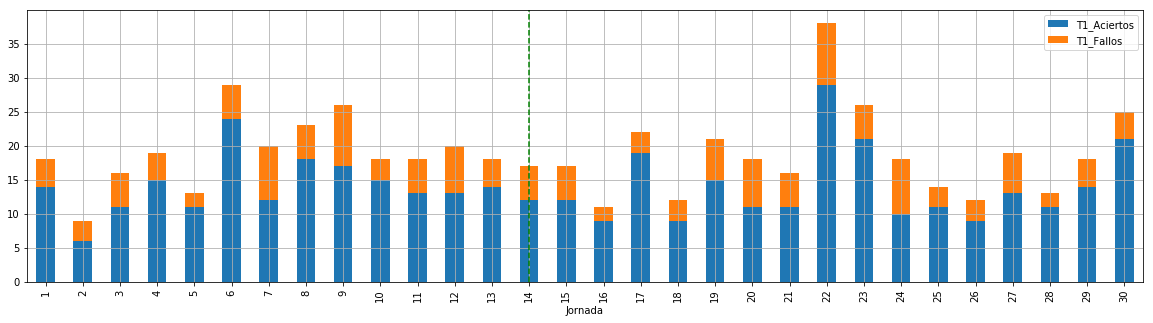

In [130]:
dt_baskonia[['Jornada', 'T1_Fallos', 'T1_Aciertos']].plot.bar(x="Jornada", 
                                                             y=["T1_Aciertos",'T1_Fallos'],
                                                             stacked=True,
                                                             figsize=[20,5], grid=True,
                                                            legend=True)

dt_baskonia['T1_MediaAcumulada'] = 
plt.axvline(median, color='g', linestyle='--')
#dt_baskonia['T1_Aciertos'].
plt.show()